# Machine Learning Based Wine Quality Prediction Project

By Victoria Pinzhen Liao

Blog: [purrgramming.life - wine](https://purrgramming.life/machine-learning/wine/)
GitHub: [Victoria-Pinzhen-Liao/wine-quality](https://github.com/Victoria-Pinzhen-Liao/wine-quality)

In this beginner-friendly project, we will build some classic machine learning models to predict the quality of red and white wines based on physicochemical variables.
It's a classification task---a type of supervised learning in which the output are usually some sorts of labels.

**Goal**: The project gives beginners a general idea of the workflow of supervised machine learning projects.

![](wine.jpg)


## Dataset

To build models for the quality prediction of red and white wines, we will use the Wine Quality Dataset of the University of California, Irvine.
This dataset contains some physicochemical values of wine together with their quality. We can use this dataset to train the model and predict the quality.

###  Reference
Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal @2009




--------------------------

## Get Started

Let's begin by importing the libraries we need for this project.

In [1]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Use a family of colors that have relatively high lightness and low saturation in plotting.
plt.style.use(["seaborn-pastel"])

# For numeric computation with arrays and dataframes.
import numpy as np
import pandas as pd

# Scikit-learn is a free software machine learning library.

# For using sklearn's classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier

# For evaluating the performance of sklearn's models  
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split

# For saving and loading models 
import pickle

# Ignore warnings
import warnings

warnings.filterwarnings("ignore")


## Step 1: Data Analysis

Before we start the model training, we first analyze the data to get more insights. For example, we can check the data quality and filter out incorrect outliers.

We will follow these steps

- Importing the Dataset
- Dataset Description
- Data Validation (Find Null and Outliers)
- Data Visualization
- Correlation / Bivariate Analysis

### Import the Dataset



In [2]:
# Online file path to the CSV files
csv_file_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
csv_file_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"


In [3]:
# Read winequality-white.csv into the dataframe
white_wine = pd.read_csv(csv_file_white, sep=";")

# Set color
white_wine["color"] = "white"

white_wine.size

63674

In [4]:
# Read winequality-red.csv into the dataframe
red_wine = pd.read_csv(csv_file_red, sep=";")

# Set color
red_wine["color"] = "red"

red_wine.size

20787

In [5]:
# Merge the red and the white wine dataframes
wine_df = pd.concat([white_wine, red_wine], axis=0)

# Print the first 5 rows of the dataframe
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


### Dataset Description


### Basic Info


- Number of Features: 12
- The target is the quality of the wine on a 0-10 scale (integers between 0 and 10).

We inspect the following aspects:
- `df#columns`: The column labels of the DataFrame.
- `df#describe`: Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
- `df#info`: Print a  summary including the index dtype and columns, non-null values, and memory usage.
- `df#shape`: Return a tuple representing the dimensionality of the DataFrame.
- `df#value_counts`: Return a Series containing counts of unique rows in the DataFrame.


In [6]:
# Return a tuple representing the dimensionality of the DataFrame
wine_df.shape

(6497, 13)

In [7]:
#  The column labels of the DataFrame.
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [8]:
#  Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
wine_df.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN


Given that the target of the model prediction is the "quality" of the wine let's have a look at its distribution

where `df#value_counts` return a Series containing counts of unique rows in the DataFrame.


In [9]:
# Return a Series containing counts of unique rows in the DataFrame.
wine_df["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### Data Validation



Data validation is an important step as data quality is important to the training of the models.

Ideally, we should use a dataset with no missing or incorrect values, i.e., outliers.

#### Fix Rows with Nulls

From the results of `#info`, we can see that there are no nulls, and we don't need to fix anything.




In [10]:
#  Print a  summary including the index dtype and columns, non-null values, and memory usage.
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


Alternatively, we can also use #isnull to find nulls

In [11]:
# Check if there are empty rows

wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

#### Naive Solution to Find Outliers

You can use Seaborn’s displot() function to visualize the data distribution, and spot the data that are unlikely to be correct.

<Figure size 720x576 with 0 Axes>

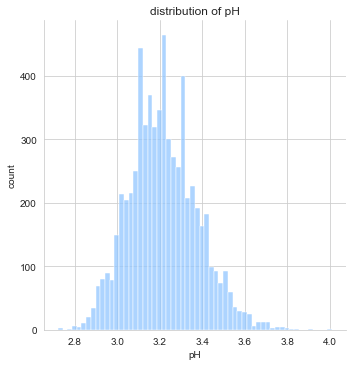

In [12]:
plt.figure(figsize=(10, 8))
pH_plot = sns.displot(data=wine_df["pH"]).set(title="distribution of pH", xlabel="pH", ylabel = "count")

#### Check Data Correctness

In this dataset, the wine whose pH level is larger than `3.9` or smaller than `1.0` looks like outliers.

In practice, we need to check the correctness of the outliers (usually with the help of data owner with expert domain knowledge) and exclude them if necessary.

However, we cannot validate if it is correct or not with the wine data owner, so we will keep these rows.


### Data Visualization

#### Motivation

We can use data visualization to present the data facts in an easy-to-understand form while telling a story and leading the viewers to an inevitable conclusion.


#### Useful Functions

Here I am showing some types of useful plots.

- `sns#displot`: Plot of data distribution.
- `sns#hisplot`: Plot of data histogram.
- `df.plot#pie`: A circular statistical graphic, which is divided into slices to illustrate numerical proportion


[Text(0.5, 1.0, 'distribution of quality'),
 Text(0.5, 0, 'quality'),
 Text(0, 0.5, 'count')]

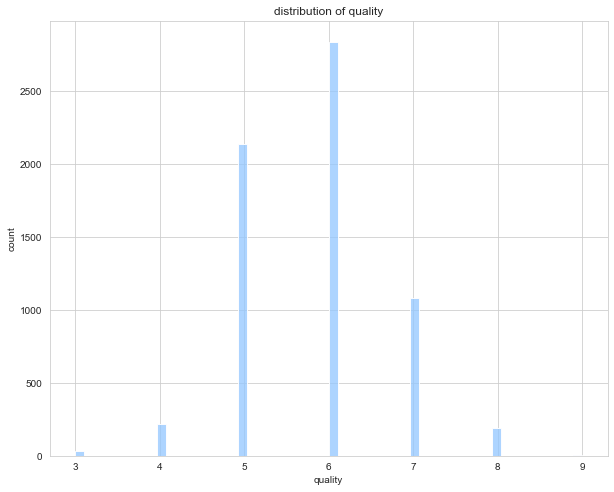

In [13]:
plt.figure(figsize=(10, 8))
sns.histplot(data=wine_df["quality"]).set(title="distribution of quality", xlabel="quality", ylabel = "count")

<Figure size 720x576 with 0 Axes>

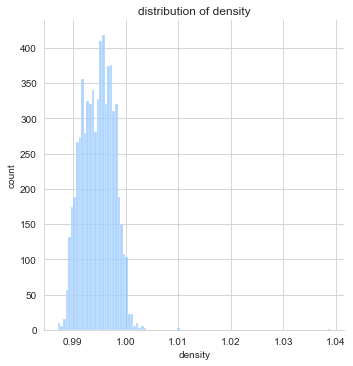

In [14]:
figure = plt.figure(figsize=(10, 8))
sns.displot(data=wine_df["density"]).set(title="distribution of density", xlabel="density", ylabel = "count")

[Text(0.5, 1.0, 'percentage of color')]

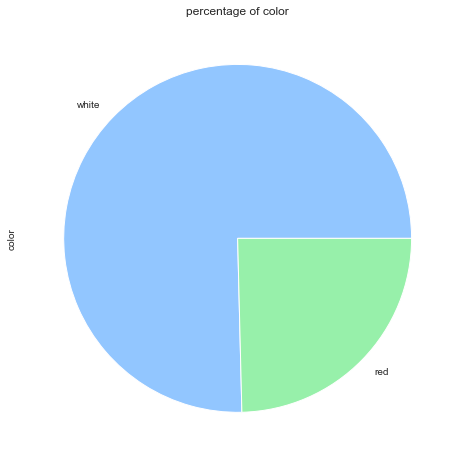

In [15]:
plt.figure(figsize=(10, 8))
wine_df["color"].value_counts().plot(kind="pie", y="colour").set(title="percentage of color")

### Correlation / Bivariate Analysis


Correlations in data show the mutual relationships or connections between two or more variables.
We can use a heatmap to visualize the correlation matrix.

#### Useful functions
- `df#corr`: Compute pairwise correlation of columns, excluding NA/null values.
- `sns#heatmap`: Plot rectangular data as a color-encoded matrix - we can use this to visualize Correlation

####    Results

|         | Correlation | Feature |
|---------|---|---|
| Abs Max | 0.44 | Alcohol |
| Abs Min | 0.003 | Sulphates  |







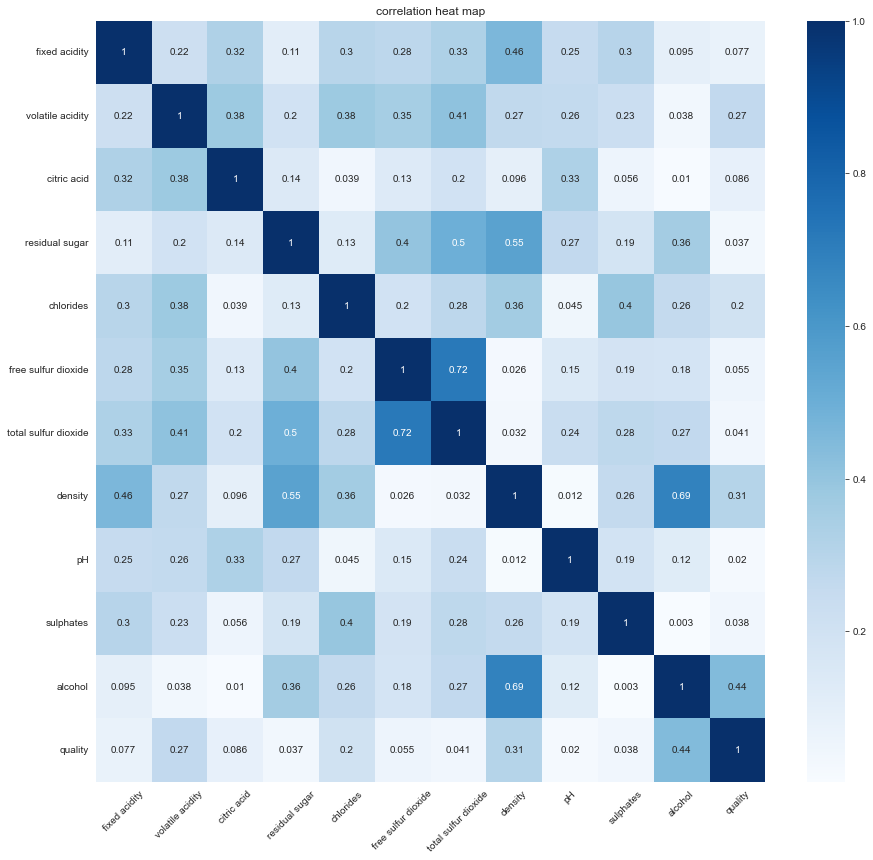

In [16]:
# Compute the abs correlation between the variables

correlation_matrix = wine_df.corr().abs()

# Use a heatmap to visualize the correlation matrix.

figure = plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Blues).set(title="correlation heat map")

# Rotate labels on the X-axis by 45 degrees for readability

plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis

We can also visualize the wine quality as explained by the value of a feature.

From the heat map / correlation matrix, we know that the most related feature is the `alcohol`
Here's how the most relevant feature, alcohol, is related to the wine quality.



[Text(0.5, 1.0, 'the wine quality as explained by the value of alcohol')]

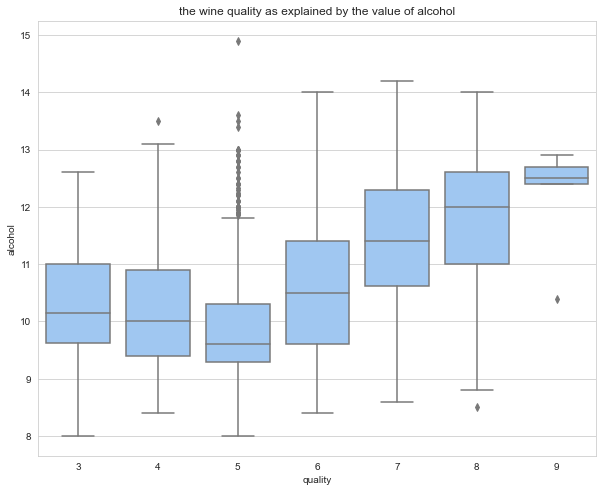

In [17]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="quality", y="alcohol", data=wine_df, color="C0").set(title="the wine quality as explained by the value of alcohol")


## Step 2:  Data Pre-processing

Data pre-processing is very important in ML projects as the scale / correctness etc. would affect the quality of the trained model.

We follow these steps:

- Data Categorization
- Data Scaling
- Prepare Training and Testing Set
- Data Balancing


-------------------------------------------

### Data Categorization

Some data are not quantitative and need to categorize  them
Like "red" and "white" are categorical - "red" is not larger or smaller than "white."
Here we use one-hot encoding for this purpose.
For example, for a category with "red" and "white", these two labels will be encoded as `[1, 0]` and `[0, 1]` respectively.


In [18]:
# One-hot encode color

wine_df = pd.get_dummies(wine_df, columns=["color"])

In this project, we simplified our target to know if the wine is good or bad instead of the score of the wine.

We define wine with higher quality than 5 as "good" by convention.


In [19]:
# Categorization of quality

wine_df["quality_bool"] = np.where(wine_df["quality"] <= 5, 0, 1).astype(bool)
wine_df = wine_df.drop(["quality"], axis=1)

In [20]:
wine_df["quality_bool"].value_counts()

True     4113
False    2384
Name: quality_bool, dtype: int64

### Data Scaling

Scaling means changing the range of values but without changing the shape of the distribution.

#### Why

Algorithms converge faster when features are relatively smaller or closer to normal distribution.



The standard score of sample `x` is calculated as:

$$
z = (x - u) / s,
$$

where `u` is the mean of the training samples or zero if `with_mean=False`, and `s` is the standard deviation of the training samples or one if `with_std=False`.




In [21]:
# The scaler is for numeric features.
# It standardizes features by removing the mean and scaling to unit variance.

scaler = StandardScaler()

# Get numeric data

num_d = wine_df.select_dtypes(exclude=["category", "bool"])

# update the cols with their normalized values

wine_df[num_d.columns] = scaler.fit_transform(num_d)


In [22]:
wine_df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.166089         -0.423183     0.284686        3.206929  -0.314975   
1         -0.706073         -0.240949     0.147046       -0.807837  -0.200790   
2          0.682458         -0.362438     0.559966        0.306208  -0.172244   
3         -0.011808         -0.666161     0.009406        0.642523   0.056126   
4         -0.011808         -0.666161     0.009406        0.642523   0.056126   
...             ...               ...          ...             ...        ...   
1594      -0.783214          1.581387    -1.642273       -0.723758   0.969605   
1595      -1.014636          1.277665    -1.504633       -0.681719   0.170311   
1596      -0.706073          1.034686    -1.298173       -0.660699   0.569958   
1597      -1.014636          1.854738    -1.366993       -0.723758   0.541412   
1598      -0.937495         -0.180205     1.041706       -0.387443   0.313042  

### Create Training and Testing Set



Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would memorize the labels of the samples that it has just seen would have a perfect score but fail to predict anything useful on yet-unseen data. This situation is called overfitting.

We can hold out part of the available data as a test set to avoid it.


In [23]:
output_index = len(wine_df.columns) - 1 # the last column is the output
output_index

13

In [24]:
# Dividing the dataset into features and output

train_data, test_data = train_test_split(wine_df, test_size=0.25, random_state=520)

### Data Balancing

One of the rules in machine learning is that it's important to balance out the dataset or at least get it close to balancing it.

#### Why
The main reason is to prioritize each class equally to avoid overfitting.

#### Note

We should perform data balancing after splitting the dataset to avoid data leakage on the label.


In [25]:
quality_map = train_data.quality_bool.value_counts()
quality_map

True     3094
False    1778
Name: quality_bool, dtype: int64

This dataset is unbalanced as 63% of the data are for good wine.

In [26]:
balanced_row_num = min(quality_map.get(False), quality_map.get(True))
balanced_row_num

1778

Make sure that the rows of good / bad wine are the same.


In [27]:
good_wine = train_data[train_data["quality_bool"] == True].sample(balanced_row_num)
bad_wine = train_data[train_data["quality_bool"] == False].sample(balanced_row_num)

train_data = pd.concat([good_wine, bad_wine], axis=0)

The data is balanced now

In [28]:
train_data["quality_bool"].value_counts()


True     1778
False    1778
Name: quality_bool, dtype: int64

In [29]:
features_train = train_data.iloc[:, :output_index]
output_train = train_data.iloc[:, output_index]

features_test = test_data.iloc[:, :output_index]
output_test = test_data.iloc[:, output_index]

# Determining the shapes of training and testing sets
print(features_train.shape)
print(output_train.shape)
print(features_test.shape)
print(output_test.shape)

(3556, 13)
(3556,)
(1625, 13)
(1625,)


## Step 3: Model Training

### Baselines

#### Random Guess Baseline

If we randomly guess if the wine is good / bad, our accuracy is 50%.

#### Majority Voting Baseline

If we always predict the majority label in the training set (before data balancing), we would get better accuracy than 50%, simply because the testing set is imbalanced (in the same way as the training set).

In the testing set,  63% of the bottles are good wine, and hence the majority voting baseline is 63%.




In [30]:
random_guess_accuracy = 0.5  # 50%
majority_vote_accuracy = 0.63  # 63%



### Classic Machine Learning Classification Algorithms

We can start the quality prediction from some classic Machine Learning  classification algorithms (See the wiki of the classifiers for more info)


In [31]:
# Note: NOT as the name suggested, LogisticRegression is a binary classification technique, not a regressor.

# Common off-the-shelf sklearn classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier(), RandomForestClassifier(),
               DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB(), SGDClassifier(),
               GaussianProcessClassifier(), AdaBoostClassifier(), MLPClassifier()]

model_names = ["Logistic Regression", "Linear Support Vector Machine", "Support Vector Clustering",
               "K-Nearest Neighbors", "Random Forest Classifier",
               "Decision Tree Classifier", "Gradient Boosting Classifier", "Gaussian Naive Bayes",
               "Stochastic Gradient Descent Classifier",
               "Gaussian Process Classifier", "Ada Boost Classifier", "Multilayer Perceptron Classifier",
               "Baseline: -- Random Guess --", "Baseline: -- Majority Vote Baseline --"]



### Accuracy & F1 Score


#### Accuracy

This function computes subset accuracy in multilabel classification: the set of labels predicted for a sample must match the corresponding labels in `y_true.`


#### F1

The F1 score can be interpreted as a harmonic mean of precision and recall, where an F1 score reaches its best value at 1 and the worst score at 0.

The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
$$
F_1 = 2 \times (\text{precision} \times \text{recall}) / (\text{precision} + \text{recall})
$$

------------------------------

#### When to Use F1 Score vs. Accuracy

There are pros and cons to using F1 score and accuracy.

**Accuracy**:

Pro: Easy to interpret. If we say that a model is 90% accurate, we know that it correctly classified 90% of observations.

Con: Does not take into account how the data is distributed. For example, suppose 90% of all players do not get drafted into the NBA. If we have a model that simply predicts every player to not get drafted, the model would correctly predict the outcome for 90% of the players. This value seems high, but the model is actually unable to correctly predict any player who gets drafted.

**F1 Score**:

Pro: Takes into account how the data is distributed. For example, if the data is highly imbalanced (e.g. 90% of all players do not get drafted and 10% do get drafted) then F1 score will provide a better assessment of model performance.

Con: Harder to interpret. The F1 score is a blend of the precision and recall of the model, which makes it a bit harder to interpret.

**As a rule of thumb**:

We often use accuracy when the classes are balanced and there is no major downside to predicting false negatives.

We often use F1 score when the classes are imbalanced and there is a serious downside to predicting false negatives.

For example, if we use a logistic regression model to predict whether or not someone has cancer, false negatives are really bad (e.g. predicting that someone does not have cancer when they actually do) so F1 score will penalize models that have too many false negatives more than accuracy will.



In [32]:
accuracy_scores = []
f1_scores = []

for model in range(len(classifiers)):
    classifier = classifiers[model]
    # Fit the model according to the given training data.
    classifier.fit(features_train, output_train)

    # Predict class labels for samples in the feature set.
    predict = classifier.predict(features_test)

    # Rounding to 3 Decimal places before adding to accuracy_scores / f1_scores
    accuracy_scores.append(round(accuracy_score(predict, output_test), 3))
    f1_scores.append(round(f1_score(predict, output_test), 3))

# Add baselines
f1_scores.append(random_guess_accuracy)
accuracy_scores.append(random_guess_accuracy)

f1_scores.append(majority_vote_accuracy)
accuracy_scores.append(majority_vote_accuracy)

# Summary
model_accuracy = pd.DataFrame({"Algo": model_names, "Accuracy": accuracy_scores}).sort_values(by=["Accuracy"])
model_f1 = pd.DataFrame({"Algo": model_names, "F1": f1_scores}).sort_values(by=["F1"])


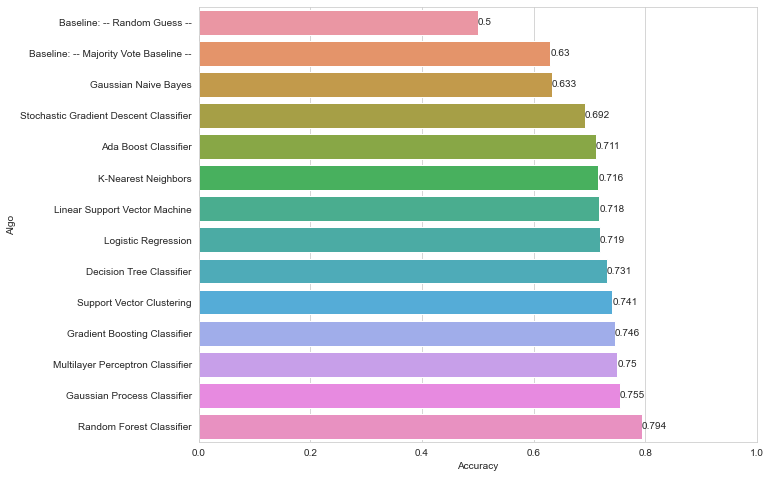

In [33]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 1)
accuracy_plot = sns.barplot(y="Algo", x="Accuracy", data=model_accuracy)
for i in accuracy_plot.containers:
    accuracy_plot.bar_label(i, )

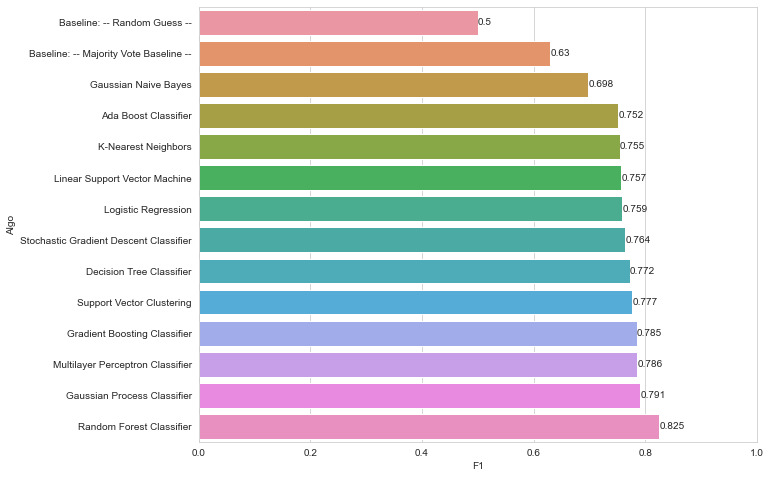

In [34]:
# Compare performance of f1
plt.figure(figsize=(10, 8))
plt.xlim(0, 1)
f1_plot = sns.barplot(y="Algo", x="F1", data=model_f1)
for i in f1_plot.containers:
    f1_plot.bar_label(i, )


#### Results

When we use the off-the-shelf models from sklean, most of the algorithms perform better than the baselines (except Gaussian Naive Bayes)

The best algorithm for the task is the Random Forest Algorithm



#### More about the Random Forest Algorithm


Random forests or random decision forests are an ensemble learning method for classification, regression, and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.



### Model Parameter Tuning

Model parameter tuning can further improve the current best algo `RandomForestClassifier`

#### Random State

The performance can be slightly different in each run, we can avoid it by using para `random_state`


In [35]:
default_random_forest_classifier = RandomForestClassifier(random_state = 520)
default_random_forest_classifier.fit(features_train, output_train)

# Calculating the training and testing accuracies
print("Training accuracy :", default_random_forest_classifier.score(features_train, output_train))
print("Testing accuracy :", default_random_forest_classifier.score(features_test, output_test))


Training accuracy : 1.0
Testing accuracy : 0.7913846153846154


We will try adjusting the following set of hyperparameters:

```python
n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
```

The current parameters of RandomForestClassifier are the default values:

```python
 n_estimators: 10,
 max_features: auto,
 max_depth: None,
```


#### Grid Search

Grid search means exhaustively generating candidates from a grid of parameter values.
Now, let's grid search for the best para.


In [36]:
# Finding the best parameters for the SVC model

param = {
    "n_estimators": [50, 100, 150],
    "max_features": [1, 2, 3],
    "max_depth": [10, 30, 50]
}


#### Cross Validation

 Cross-validation is a resampling method that uses different data portions to test and train a model on different iterations to avoid over fitting.

In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset) and a dataset of unknown data (or first seen data) against which the model is tested (called the validation dataset or testing set).



We will run 5 rounds as we passed in para `cv=5`

During the grid search,     the parameters of the estimator used to apply these methods are optimized by a cross-validated search over parameter settings.


In [37]:
grid_random_forest = GridSearchCV(default_random_forest_classifier, param_grid=param, scoring="accuracy", cv=5)

In [38]:
# This step takes quite a long time (around 20 min)

grid_random_forest.fit(features_train, output_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=520),
             param_grid={'max_depth': [10, 30, 50], 'max_features': [1, 2, 3],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [39]:
# These are the parameters that have the best performance

grid_random_forest.best_params_

{'max_depth': 30, 'max_features': 1, 'n_estimators': 150}

In [40]:
# creating a new Random Forest Classifier model with these best parameters

better_random_forest_classifier = RandomForestClassifier(n_estimators=150, max_features=2, max_depth=30, random_state = 520)
better_random_forest_classifier.fit(features_train, output_train)

# Calculating the training and testing accuracies
print("Training accuracy :", better_random_forest_classifier.score(features_train, output_train))
print("Testing accuracy :", better_random_forest_classifier.score(features_test, output_test))


Training accuracy : 1.0
Testing accuracy : 0.796923076923077


#### Parameter Tuning Results



After parameter tuning, the performance of the  Random Forest Classifier model is improved





In [51]:
print("Testing accuracy :", default_random_forest_classifier.score(features_test, output_test))
print("Testing accuracy :", better_random_forest_classifier.score(features_test, output_test))

Testing accuracy : 0.7913846153846154
Testing accuracy : 0.796923076923077


# Step 4: Save and  Load Models

After training a  model, it is desirable to have a way to persist the model for future use without having to retrain. 

In [41]:
stored_model = pickle.dumps(default_random_forest_classifier)

In [42]:
loaded_model = pickle.loads(stored_model)

In [43]:
default_random_forest_classifier.predict(features_train[0:1])

array([ True])

In [44]:
loaded_model.predict(features_train[0:1])

array([ True])

In [45]:
# Compare the heap model vs loaded model
print("Heap Model's Accuracy:", default_random_forest_classifier.score(features_test, output_test))
print("Loaded Model's Accuracy :", loaded_model.score(features_test, output_test))

Heap Model's Accuracy: 0.7913846153846154
Loaded Model's Accuracy : 0.7913846153846154


#### Parameter Tuning Results

After parameter tuning, the performance of the  Random Forest Classifier model is improved

- Before: 80.06%
- After: 80.8%


# Step 4: Save and  Load Models

After training a  model, it is desirable to have a way to persist the model for future use without having to retrain.

Let's store the trained random forest classifier model 

In [46]:
stored_model = pickle.dumps(default_random_forest_classifier)

Then load it again

In [47]:
loaded_model = pickle.loads(stored_model)

We can compare the results of the heap model vs. the unpickled model


In [48]:
default_random_forest_classifier.predict(features_train[0:1])

array([ True])

In [49]:
loaded_model.predict(features_train[0:1])

array([ True])

In [50]:
# The scores are the same
print("Heap Model's Accuracy:", default_random_forest_classifier.score(features_test, output_test))
print("Loaded Model's Accuracy :", loaded_model.score(features_test, output_test))

Heap Model's Accuracy: 0.7913846153846154
Loaded Model's Accuracy : 0.7913846153846154


Can see that the heap model and the unpickled model are the same.

--------------------------



Thanks : )
Victoria Pinzhen Liao